In [1]:
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.appName('bank').getOrCreate()
df = spark.read.csv('bank.csv', header = True, inferSchema = True)
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)



Input variables are: age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome

Output variable is: deposit

In [3]:
#Showing the spark dataframe containing data
df.show()

+---+-----------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+
|age|        job| marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|deposit|
+---+-----------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+
| 59|     admin.| married|secondary|     no|   2343|    yes|  no|unknown|  5|  may|    1042|       1|   -1|       0| unknown|    yes|
| 56|     admin.| married|secondary|     no|     45|     no|  no|unknown|  5|  may|    1467|       1|   -1|       0| unknown|    yes|
| 41| technician| married|secondary|     no|   1270|    yes|  no|unknown|  5|  may|    1389|       1|   -1|       0| unknown|    yes|
| 55|   services| married|secondary|     no|   2476|    yes|  no|unknown|  5|  may|     579|       1|   -1|       0| unknown|    yes|
| 54|     admin.| married| tertiary|     no|    184|     no|  

In [4]:
#Using pandas dataframe to show the data
import pandas as pd
df_pandas = pd.DataFrame(df.take(10), columns=df.columns)

In [5]:
df_pandas

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [6]:
#Checking whether our data is balanced or not
data = pd.read_csv("bank.csv")

In [7]:
data["deposit"].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [8]:
#Using groupby command to show the balancing in dataset
df.groupBy(df.deposit).count().show()

+-------+-----+
|deposit|count|
+-------+-----+
|     no| 5873|
|    yes| 5289|
+-------+-----+



So as from our data the no clients suscribing to term deposit and the ones not subscribing are close,so our dataset is balanced(we dont need to further balance it)

In [9]:
#Data types of variables
df.dtypes

[('age', 'int'),
 ('job', 'string'),
 ('marital', 'string'),
 ('education', 'string'),
 ('default', 'string'),
 ('balance', 'int'),
 ('housing', 'string'),
 ('loan', 'string'),
 ('contact', 'string'),
 ('day', 'int'),
 ('month', 'string'),
 ('duration', 'int'),
 ('campaign', 'int'),
 ('pdays', 'int'),
 ('previous', 'int'),
 ('poutcome', 'string'),
 ('deposit', 'string')]

In [10]:
#Showing the mean,stdev,min,max,count of all the numerical features(only numerical features)
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int']
df.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
age,11162,41.231947679627304,11.913369192215518,18,95
balance,11162,1528.5385235620856,3225.413325946149,-6847,81204
day,11162,15.658036194230425,8.420739541006462,1,31
duration,11162,371.99381831213043,347.12838571630687,2,3881
campaign,11162,2.508421429851281,2.7220771816614824,1,63
pdays,11162,51.33040673714388,108.75828197197717,-1,854
previous,11162,0.8325568894463358,2.292007218670508,0,58


Correlation between the independent variables

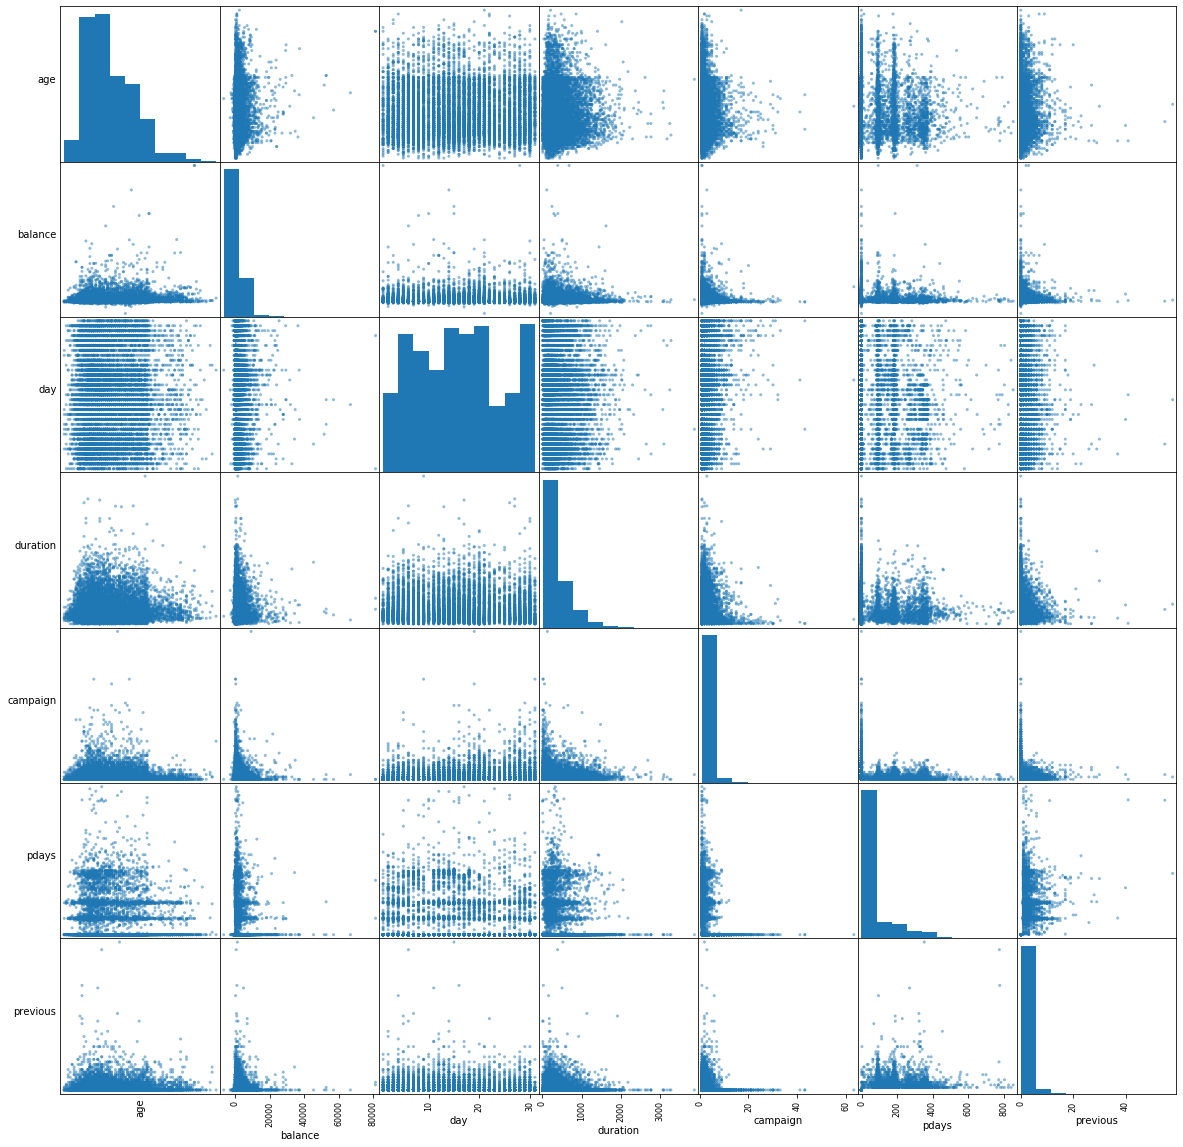

In [11]:
import matplotlib.pyplot as plt
import pandas
from pandas.plotting import scatter_matrix
%matplotlib inline

numeric_data = df.select(numeric_features).toPandas()
axs = pd.plotting.scatter_matrix(numeric_data, figsize=(20,20));
for i in range(len(numeric_data.columns)):
    pov = axs[i, 0]
    pov.yaxis.label.set_rotation(0)
    pov.yaxis.label.set_ha('right')
    pov.set_yticks(())
    hoh = axs[i,0]
    hoh.xaxis.label.set_rotation(90)
    hoh.set_xticks(())

As from the plots it seems that our numeerical features are highly correlated we will take nearly all of them

In [12]:
#Removed the day and month columns
df = df.select('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit')
cols = df.columns
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)



In [13]:
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler

All these below are the categorical features in our dataset

In [14]:
categoricalColumns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
stages = []

Performing:Category Indexing, One-Hot Encoding and VectorAssembler

String indexer used to index each of the categorical column

Then we convert each categories to one hot encoded variables.The resulting output has the binary vectors appended to the end of each row. We use the StringIndexer again to encode our labels to label indices. Next, we use the VectorAssembler to combine all the feature columns into a single vector column.

In [15]:
for categoricalCol in categoricalColumns:
    #Indexing the columns
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    #Converting categories to one hot encoding
    encoder = OneHotEncoderEstimator(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]

In [16]:
label_stringIdx = StringIndexer(inputCol = 'deposit', outputCol = 'label')
stages += [label_stringIdx]

In [17]:
numericCols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [18]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)
selectedCols = ['label', 'features'] + cols
df = df.select(selectedCols)
df.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)



In [19]:
pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
label,1,1,1,1,1
features,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
age,59,56,41,55,54
job,admin.,admin.,technician,services,admin.
marital,married,married,married,married,married
education,secondary,secondary,secondary,secondary,tertiary
default,no,no,no,no,no
balance,2343,45,1270,2476,184
housing,yes,no,yes,yes,no
loan,no,no,no,no,no


As now we can see that our dataframe has both label,features and rest of other columns

In [20]:
#Splitting the dataset into train and test
train, test = df.randomSplit([0.7, 0.3], seed = 2018)

Using logistic regression model

In [21]:
from pyspark.ml.classification import LogisticRegression
l_g_r = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
l_g_r = l_g_r.fit(train)

In [22]:
#Beta coefficients
print(l_g_r.coefficients)

[-0.24320336076426433,-0.3244617154308246,-0.07788097141951723,0.14350089489636497,-0.3255563221671673,0.6732804035395703,-0.448007329043044,0.7662118406049874,-0.09464213643690922,-0.4696801569668047,-0.3078933703891673,-0.19455241480691804,-0.02312529838005294,-0.20397048241333388,0.121613557596887,-0.42321284298717304,-1.021889775614131,0.7530983610444133,0.5557388153588018,0.11850161902221971,-1.025816055134202,-0.7954711583764613,-0.36971515255570914,2.0081104514706074,-0.009177267778622324,4.665780632187318e-05,0.005046786655069337,-0.13671793038263716,0.00010520379051454914,0.0005511539870927711]


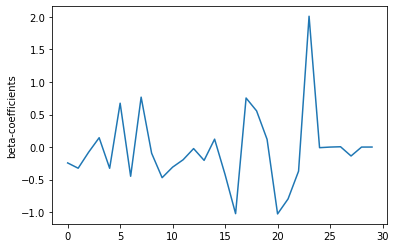

In [23]:
#PLotting the beta coefficients
plt.plot(l_g_r.coefficients)
plt.ylabel('beta-coefficients')
plt.show()

Sorting the coefficients and then plotting them

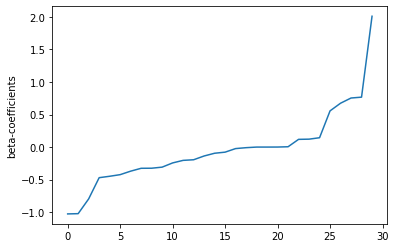

In [24]:
import numpy as np
plt.plot(np.sort(l_g_r.coefficients))
plt.ylabel("beta-coefficients")
plt.show()

In [25]:
#summarizing the model
trainingSummary = l_g_r.summary
roc = trainingSummary.roc.toPandas()

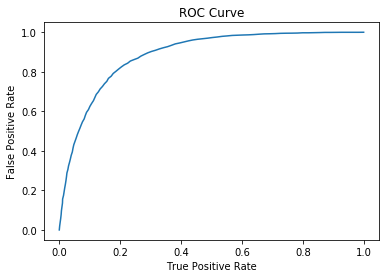

In [26]:
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

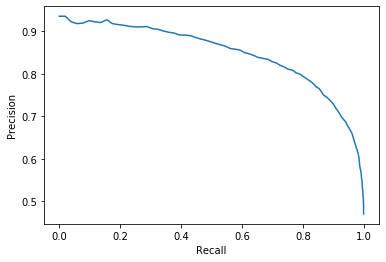

In [27]:
#Plotting the precision vs the recall
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [28]:
#Making prediction on the test data
predictions = l_g_r.transform(test)

In [29]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()

In [30]:
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))
print('Test data area Under ROC', evaluator.evaluate(predictions))

Training set areaUnderROC: 0.8849092421146739
Test data area Under ROC 0.8858324614449619


Using logistic regression model with elastic net regularization.

In [31]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

In [32]:
l_g_n_r = lr.fit(train)

In [33]:
predictions_l_g_n_r = l_g_n_r.transform(test)

In [34]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions_l_g_n_r)))

Test Area Under ROC: 0.5


Using decision trees for classification

In [35]:
from pyspark.ml.classification import DecisionTreeClassifier
d_t = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
d_t = d_t.fit(train)

In [36]:
predictions_d_t = d_t.transform(test)

In [37]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions_d_t, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.7910083562522027


Using Random Forest Classifier for classification

In [38]:
from pyspark.ml.classification import RandomForestClassifier
r_f = RandomForestClassifier(featuresCol = 'features', labelCol = 'label',numTrees=10)

In [39]:
r_f = r_f.fit(train)

In [40]:
predictions_r_f = r_f.transform(test)

In [41]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions_r_f)))

Test Area Under ROC: 0.8839449503092995


Using Gradient boosted tree classifier

In [42]:
from pyspark.ml.classification import GBTClassifier
g_b_t = GBTClassifier(labelCol="label", featuresCol="features", maxIter=10)
g_b_t = g_b_t.fit(train)

In [43]:
predictions_g_b_t = g_b_t.transform(test)

In [44]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions_g_b_t)))

Test Area Under ROC: 0.8940728473145346


Using support vector machine classifier

In [45]:
from pyspark.ml.classification import LinearSVC
l_s_v_c = LinearSVC(maxIter=10, regParam=0.1)
l_s_v_c = l_s_v_c.fit(train)

In [46]:
predictions_l_s_v_c = l_s_v_c.transform(test)

In [47]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions_l_s_v_c)))

Test Area Under ROC: 0.8784537880659109
